In [ ]:
import utils
utils.train_models_count_zeroed_AFs(
        save_output="whatever fuckhead",
        runs = 5,
        layers=[[8]], 
        epochs={"relu": 200, "both": 0, "bspline": 10}
    )

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 

# variable information 
print(bike_sharing.variables)

ModuleNotFoundError: No module named 'ucimlrepo'

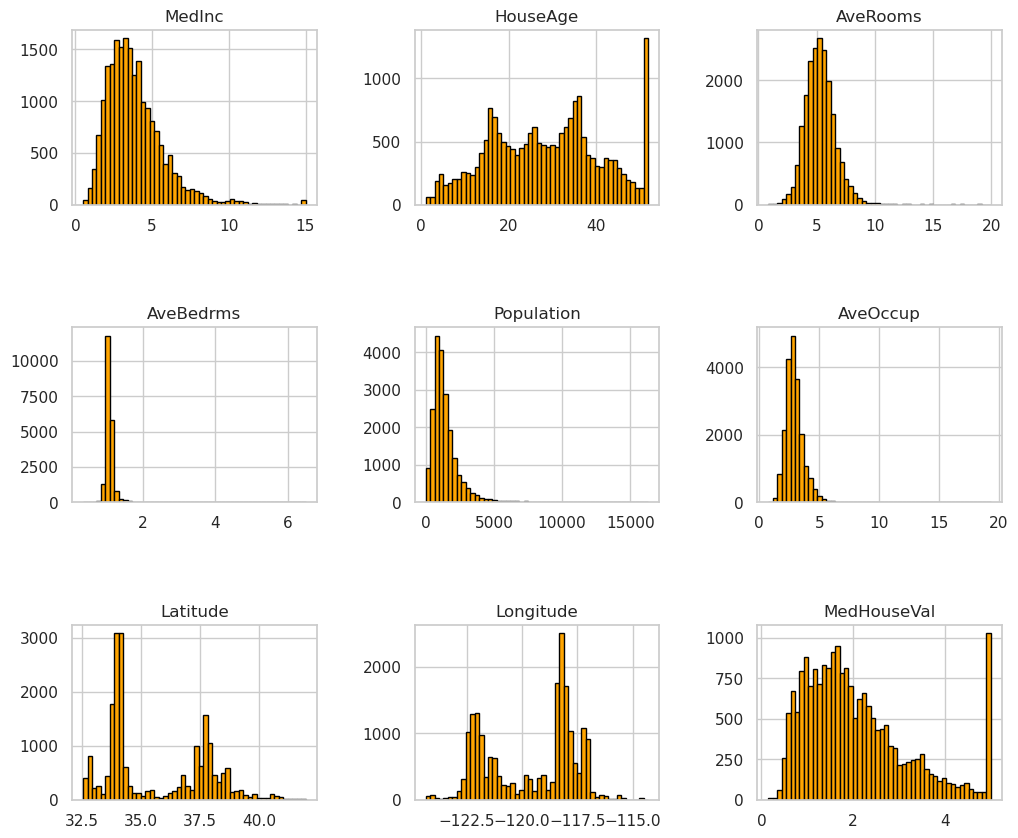

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the housing data
housing = fetch_california_housing(as_frame=True)

# Define thresholds for specific features (adjust as needed)
thresholds = {
    "AveRooms": 20,  
    "AveOccup": 20, 
    "AveBedrms": 10,  
    "Population": 20000, 
}

# Filter the data based on thresholds
filtered_data = housing.frame.copy()
for feature, threshold in thresholds.items():
    if feature in filtered_data.columns:
        filtered_data = filtered_data[filtered_data[feature] <= threshold]

# Plot histograms for the filtered data
filtered_data.hist(figsize=(12, 10), bins=50, edgecolor="black", color="orange")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()


Avg over last 5 epochs on 200R 10B,[24, 48, 24, 8],med: 0.4137 in 654.1745260485437s
Avg over last 5 epochs on 200R 10B,[24, 48, 96, 48, 24, 8],med: 0.41569999999999996 in 535.1921404509806s


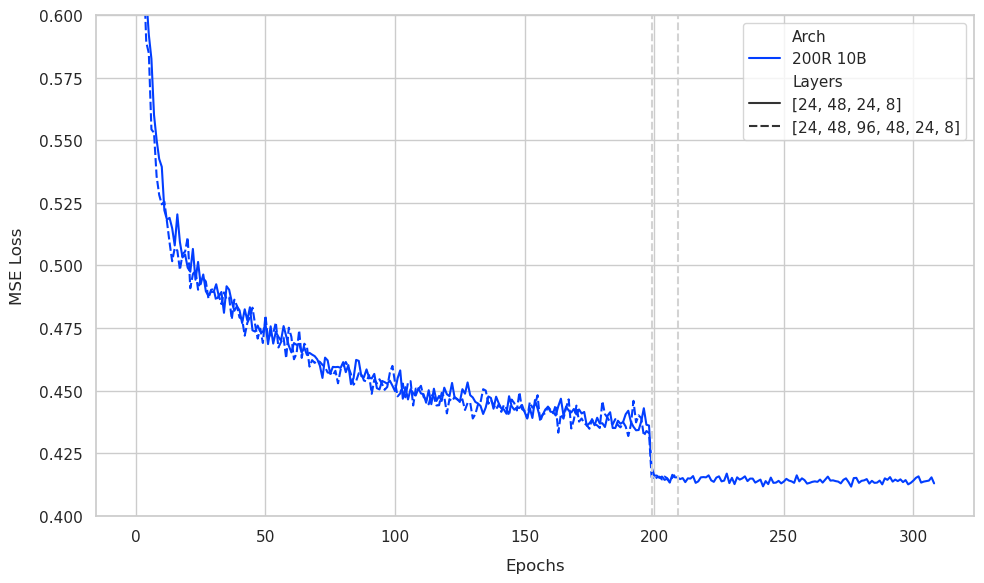

In [4]:
import importlib, utils
importlib.reload(utils)

selector = "med"
data = "vals"

utils.plot_seaborn(
    # title="ReLU vs BSpline, W&B_lr=0.001 BS_lr=0.0001 ctrl=3",
    model_paths=[

        # ReLU to Bspline to Both
        ("RBL", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,10,0,150,100)_100", "vals", "med"),
        ("", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,10,0,10,0)_100", "vals", "med"),
        

    ],
    aes=[
        ("200R 10B", "[24, 48, 24, 8]"),
        ("200R 10B", "[24, 48, 96, 48, 24, 8]"),
    ],
    x = "epochs", 
    # xlim = 300,
    xmin = 0,
    ylim = .6,
    ymin = .4,
    hide_legend = False,
    # cutoff = 260-1,
    vbars = [(199, "lightgrey"), (209, "lightgrey")],
)

### Archs Comparison

| Model                       | Params   | FLOPs/input   | μs/input (sim)   | μs/input (dset)   |
|-----------------------------|----------|---------------|------------------|-------------------|
| ReLU [8]                    | 81       | 152           | 3.4141           | 3.5525            |
| ReLU [24, 8]                | 425      | 816           | 8.0478           | 8.0016            |
| ReLU [24, 48, 24, 8]        | 2.8 K    | 5496          | 14.4401          | 14.5342           |
| ReLU [8, 48, 192, 48, 8]    | 19.58 K  | 38848         | 17.064           | 17.1816           |
| ReLU [24, 48, 96, 24, 8]    | 8.66 K   | 17112         | 18.0665          | 18.1228           |
| BSpline [8]                 | 105      | 3024          | 28.7476          | 27.8772           |
| BSpline [24, 8]             | 521      | 12304         | 60.9583          | 59.9963           |
| BSpline [24, 48, 24, 8]     | 3.11 K   | 42832         | 115.945          | 114.511           |
| BSpline [24, 48, 96, 24, 8] | 9.26 K   | 88912         | 148.362          | 147.978           |
| LSpline [8]                 | 129      | 144           | 13.0892          | 13.0519           |
| LSpline [24, 8]             | 617      | 784           | 28.843           | 28.8996           |
| LSpline [24, 48, 24, 8]     | 3.42 K   | 5392          | 58.0655          | 60.4286           |
| LSpline [24, 48, 96, 24, 8] | 9.86 K   | 16912         | 74.9301          | 79.5207           |


Avg over last 5 epochs on 150R 50B,[8],avg: 0.49395900000000026 in 253.94785319000007s
Avg over last 5 epochs on 200R,[8],avg: 0.5043169999999997 in 175.48539656999998s
Avg over last 5 epochs on 150R 50B,[24, 8],avg: 0.45438118811881206 in 352.44769751485137s
Avg over last 5 epochs on 200R,[24, 8],avg: 0.483822772277228 in 213.8850091980197s
Avg over last 5 epochs on 150R 50B,[24, 48, 24, 8],avg: 0.4456294117647059 in 530.0894295098037s
Avg over last 5 epochs on 200R,[24, 48, 24, 8],avg: 0.4618068627450981 in 292.004070607843s


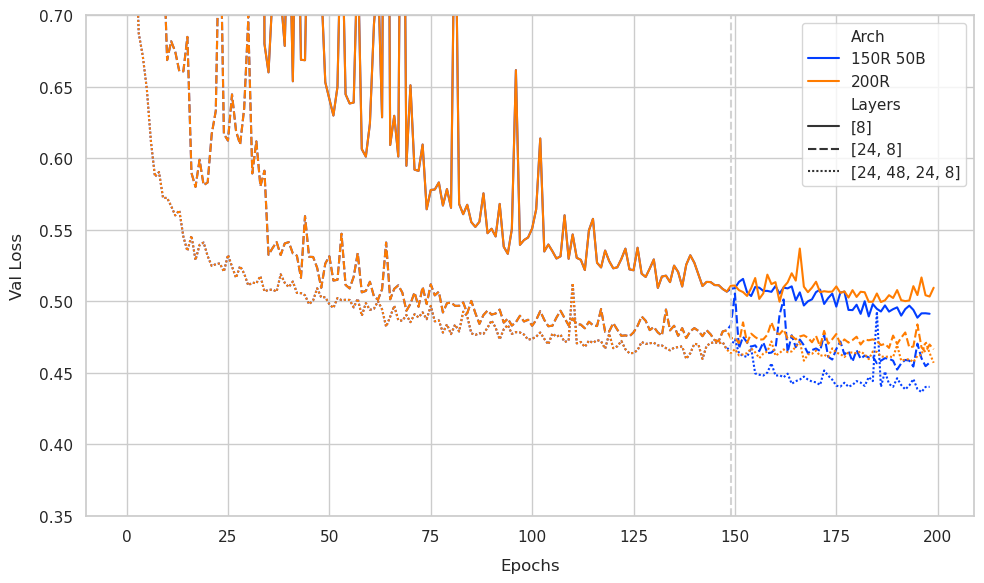

In [40]:
import utils
import importlib
importlib.reload(utils)
# ~~~~~~~~~~~~~~~
# ~ Testing Learning Rate
# ~~~~~~~~~~~~~~~
        
utils.plot_seaborn(
    model_paths=[
        ("", "[8]_(0.001,0.0001,0.0001)_(150,0,50,50,0)_100", "vals", "avg"),
        ("", "[8]_(0.001,0.0001,0.0001)_(150,0,50,50,0)_100", "cr_vals", "avg"),

        ("", "[24, 8]_(0.001,0.0001,0.0001)_(150,0,50,50,0)_100", "vals", "avg"),
        ("", "[24, 8]_(0.001,0.0001,0.0001)_(150,0,50,50,0)_100", "cr_vals", "avg"),

        ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,0,50,50,0)_100", "vals", "avg"),
        ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,0,50,50,0)_100", "cr_vals", "avg"),

        # ("", "", "vals", "avg"),
    ],
    aes=[
        ("150R 50B", "[8]"),
        ("200R", "[8]"),

        ("150R 50B", "[24, 8]"),
        ("200R", "[24, 8]"),

        ("150R 50B", "[24, 48, 24, 8]"),
        ("200R", "[24, 48, 24, 8]"),

        # ("", ""),
    ],
    x="epochs", 
    # xlim = 300,
    xmin=0,
    ylim = .7,
    ymin=.35,
    hide_legend=False,
    vbars = [(149, "lightgrey")],
)

#### Testing Learning Rate - Cal Housing

In [ ]:
import utils
import importlib
importlib.reload(utils)
# ~~~~~~~~~~~~~~~
# ~ Testing Learning Rate
# ~~~~~~~~~~~~~~~
        
utils.plot_multiple2(
    model_paths=[

        # ("", "", "vals", "med"),
        # ("", "", "vals", "med"),
        # ("", "", "vals", "med"),

    #^ ReLU: use 0.00075 for LR
        #? [8]- best @ 0.00075
            # ("learning_rate/[8]", "[8]_(0.005,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.0025,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[8]", "[8]_(0.00075,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"), # ! best
            # ("learning_rate/[8]", "[8]_(0.0005,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.00025,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.0001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(7.5e-05,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
        #? [24, 8]- best at 0.0005
            # ("learning_rate/[24, 8]", "[24, 8]_(0.005,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.0025,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.0005,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"), # ! best
            # ("learning_rate/[24, 8]", "[24, 8]_(0.00025,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.0001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 8]", "[24, 8]_(7.5e-05,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),

        #? [24, 48, 24, 8] - best at .00075
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.005,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.0025,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"), #! best on avg
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.0005,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00025,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.0001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(7.5e-05,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "med"),

    #^ W&B and BSpline: use 0.00025
        #? [8] - all about the same
            # ("learning_rate/[8]", "[8]_(0.001,0.0005,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.001,0.00025,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.001,7.5e-05,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[8]", "[8]_(0.001,5e-05,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            
        #? [24, 8] - all about the same
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,0.0005,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,0.00025,0.0001)_(0,0,200,0,0)_100", "vals", "avg"), #! marginally best on avg
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,7.5e-05,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 8]", "[24, 8]_(0.001,5e-05,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),

        #? [24, 48, 24, 8] - .00025 spline best on med, but all about the same
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,0.0005,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,0.00025,0.0001)_(0,0,200,0,0)_100", "vals", "avg"), #! best on med
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,7.5e-05,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,5e-05,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
    
        #* Theoretically optimal: 0.00075 ReLU, 0.00025 BSpline- 0.001 and 0.0001 are fine

            # ("learning_rate/best", "[8]_(0.00075,0.00025,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
            # ("learning_rate/best", "[24, 8]_(0.00075,0.00025,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),



        ("RB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(100,10,0,0,0)_100", "vals", "med"),
        ("RB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(125,10,0,0,0)_100", "vals", "med"),
        ("RB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(150,10,0,0,0)_100", "vals", "med"),
        ("RB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(175,10,0,0,0)_100", "vals", "med"),
        ("RB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(200,10,0,0,0)_100", "vals", "med"),
    ],
    
    x="epochs", 
    # xlim = 300,
    xmin=0,
    ylim = .6,
    ymin=.3,
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
    hide_legend=False,
)

##### Testing Switching Time

In [ ]:
import utils

# ~~~~~~~~~~~~~~~
# ~ Testing Switching Time - need to use average or its hard to see the drop clearly
# ~~~~~~~~~~~~~~~
utils.plot_multiple2(
    model_paths=[
        
        # ("", "", "vals", "avg"),
        # ("", "", "vals", "avg"),
        # ("", "", "vals", "avg"),

    #^ W&B on ReLU
        # ("learning_rate/[8]", "[8]_(0.00075,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"), 
        # ("learning_rate/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
        # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
    

    #^ W&B on ReLU -> BSpline
        #? [8]- prob just not enough params to converge here...
            # ("WB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(100,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(125,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(150,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(175,10,0,0,0)_100", "vals", "avg"), #! need 175+
            # ("WB timing_transfer/0.00025 bs_lr/[8]", "[8]_(0.00075,0.00025,0.0001)_(200,10,0,0,0)_100", "vals", "avg"), 

        #? [24, 8]
        #! lowk try on 50 ReLU
            # ("WB timing_transfer/0.00025 bs_lr/[24, 8]", "[24, 8]_(0.00075,0.00025,0.0001)_(100,10,0,0,0)_100", "vals", "avg"), #! all fine
            # ("WB timing_transfer/0.00025 bs_lr/[24, 8]", "[24, 8]_(0.00075,0.00025,0.0001)_(125,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[24, 8]", "[24, 8]_(0.00075,0.00025,0.0001)_(150,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[24, 8]", "[24, 8]_(0.00075,0.00025,0.0001)_(175,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[24, 8]", "[24, 8]_(0.00075,0.00025,0.0001)_(200,10,0,0,0)_100", "vals", "avg"),

        #? [24, 48, 24, 8]
        #! lowk try on 50 ReLU- wait for other lr first tho ig
            # ("WB timing_transfer/0.00025 bs_lr/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.0001)_(100,10,0,0,0)_100", "vals", "avg"), #! all fine
            # ("WB timing_transfer/0.00025 bs_lr/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.0001)_(125,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.0001)_(150,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.0001)_(175,10,0,0,0)_100", "vals", "avg"),
            # ("WB timing_transfer/0.00025 bs_lr/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.0001)_(200,10,0,0,0)_100", "vals", "avg"),

#& Now, implement linear splines:

    #^ W&B and BSpline -> W&B on LinSpline
        #? [8] - min 150 pretraining
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.00025,0.00025)_(0,0,100,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.00025,0.00025)_(0,0,125,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.00025,0.00025)_(0,0,150,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.00025,0.00025)_(0,0,175,0,50)_100", "vals", "avg"),
            # ("(RB)B timing_transfer/[8]", "[8]_(0.00075,0.00025,0.00025)_(0,0,200,0,50)_100", "vals", "avg"),

            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.0001,0.0001)_(0,0,125,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.0001,0.0001)_(0,0,150,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.0001,0.0001)_(0,0,175,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[8]", "[8]_(0.00075,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),

        #? [24, 8] - more is better, min 150
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.00025,0.00025)_(0,0,100,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.00025,0.00025)_(0,0,125,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.00025,0.00025)_(0,0,150,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.00025,0.00025)_(0,0,175,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.00025,0.00025)_(0,0,200,0,50)_100", "vals", "avg"),

            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(0,0,125,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(0,0,150,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(0,0,175,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 8]", "[24, 8]_(0.00075,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),

        #? [24, 48, 24, 8] - all about the same, min 125
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.00025)_(0,0,100,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.00025)_(0,0,125,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.00025)_(0,0,150,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.00025)_(0,0,175,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.00025,0.00025)_(0,0,200,0,50)_100", "vals", "avg"),
            
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(0,0,125,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(0,0,150,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(0,0,175,0,50)_100", "vals", "avg"),
            # ("(WB)B timing_transfer/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.00075,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),

    # ("", "", "vals", "avg"),

    #^ W&B on ReLU -> BSpline -> W&B on LinSpline:
        #? [8]
        # ("RBL", "[8]_(0.001,0.0001,0.0001)_(150,5,0,0,50)_100", "vals", "avg"),
        #? [24, 8]
        # ("RBL", "[24, 8]_(0.001,0.0001,0.0001)_(150,5,0,0,50)_100", "vals", "avg"),
        #? [24, 48, 24, 8]
        # ("RBL", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,5,0,0,50)_100", "vals", "avg"),
    
    #^ W&B on ReLU -> W&B and BSpline -> W&B on LinSpline
        #? [8]
        # ("R(WB)L", "[8]_(0.001,0.0001,0.0001)_(150,0,20,0,50)_100", "vals", "avg"),
        #? [24, 8]
        # ("R(WB)L", "[24, 8]_(0.001,0.0001,0.0001)_(150,0,20,0,50)_100", "vals", "avg"),
        #? [24, 48, 24, 8]
        # ("R(WB)L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,0,20,0,50)_100", "vals", "avg"),

    
    #^ W&B on ReLU -> BSpline -> W&B and BSpline -> W&B on LinSpline
        #? [8]
        # ("RB(WB)L", "[8]_(0.001,0.0001,0.0001)_(150,20,20,0,50)_100", "vals", "avg"),
        #? [24, 8]
        # ("RB(WB)L", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,20,0,50)_100", "vals", "avg"),
        #? [24, 48, 24, 8]
        # ("RB(WB)L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,20,0,50)_100", "vals", "avg"),

    ],
    
    x="epochs", 
    xlim = 300,
    xmin=0,
    ylim = .8,
    ymin=.3,
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
)

In [ ]:
import utils

# ~~~~~~~~~~~~~~~
# ~ Testing Switching Time - need to use average or its hard to see the drop clearly
# ~~~~~~~~~~~~~~~
utils.plot_multiple2(
    model_paths=[
        
        ("WB", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_100", "vals", "avg"),
        # ("", "", "vals", "avg"),

    ],
    
    x="epochs", 
    xlim = 300,
    xmin=0,
    ylim = .8,
    ymin=.3,
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
)

#### Comparing Architectures- fwd latency

In [ ]:
import utils, importlib
importlib.reload(utils)

n=24
utils.graph_params_x_lat(
    archs = [
        [n],
        [n]*2,
        [n]*4,
        [n]*8,
        [n]*16,
        [n]*32,
        [n]*64,
        [n]*128,
        [n]*256,
    ]
)

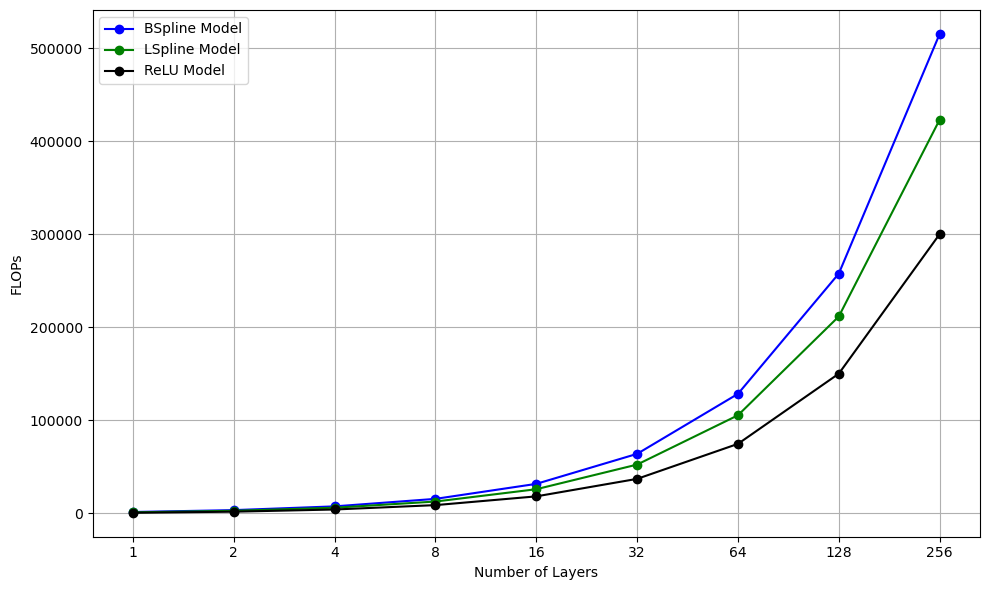

In [4]:
import utils, importlib
importlib.reload(utils)

n=24
utils.graph_params_x_flops(
    archs = [
        [n],
        [n]*2,
        [n]*4,
        [n]*8,
        [n]*16,
        [n]*32,
        [n]*64,
        [n]*128,
        [n]*256,
    ]
)

#### Old tests

In [ ]:
#! tests before Jan 7 11am- timing fucked up bc only taking microsec

import utils
utils.plot_multiple2(
    model_paths=[

        #* New
        # ("", "model", "vals", "avg"),
        # ("", "model", "vals", "avg"),
        # ("", "model", "vals", "avg"),

        # ("", "[8]_(0.001,0.0001,0.0001)_(200,5,5,25,5)_100", "vals", "avg"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(200,5,5,25,5)_100", "cr_vals", "avg"),
        
        # ("", "[24, 8]_(0.001,0.0001,0.0001)_(200,5,5,25,5)_100", "vals", "avg"),
        # ("", "[24, 8]_(0.001,0.0001,0.0001)_(200,5,5,25,5)_100", "cr_vals", "avg"),

        # ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,5,5,25,5)_100", "vals", "avg"),
        # ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,5,5,25,5)_100", "cr_vals", "avg"),
        
        
        # ("timing_broken/new tests", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_10", "vals", "avg"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(175,25,0,25,0)_10", "vals", "avg"),
        # ("new tests", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_10", "vals", "avg"),

        # ("timing_broken/new tests", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_10", "vals", "avg"),
        # ("new tests", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_10", "vals", "avg"),
        # ("new tests", "[24, 8]_(0.001,0.0001,0.0001)_(175,25,0,25,0)_10", "vals", "avg"),

        # ("timing_broken/new tests", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_10", "vals", "avg"),
        # ("new tests", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(175,25,0,25,0)_10", "vals", "avg"),
        
        #* tests to rerun on  

        # ~~~~~~~~~~~~~~~
        # ~ ReLU
        # ~~~~~~~~~~~~~~~
        # ("learning_rate/[8]", "[8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
        # ("learning_rate/[24, 8]", "[24, 8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),
        # ("learning_rate/[24, 48, 24, 8]", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", "avg"),

        #? 521, 28fwd param LSpline vs 8.66k, 18fwd param relu
        # ("R", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"), # bspline
        # ("R->B->RB->L", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"), # pretraining

        # ~~~~~~~~~~~~~~~
        # ~ BSpline
        # ~~~~~~~~~~~~~~~

        # ("WB", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_100", "vals", "med"),
        # ("WB", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,0)_100", "vals", "med"),

        # ~~~~~~~~~~~~~~~
        # ~ BSpline --> Linear
        # ~~~~~~~~~~~~~~~

        #? Need 200-250 epochs on BSpline before switch on [8] and [24, 8]
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),
        # ("RB->L/8", "[8]_(0.001,0.0001,0.0001)_(0,0,300,0,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,300,0,50)_100", "vals", "avg"),

        #? but on [24,48,24,8], we don't see the result on 200 epochs
        # ("RB->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("RB->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),
        
        # ~~~~~~~~~~~~~~~
        #~ ReLU --> BSpline --> Linear
        # ~~~~~~~~~~~~~~~

        # ("R(WB)L", "[8]_(0.001,0.0001,0.0001)_(150,0,20,0,50)_100", "vals", "med"),
        # ("R(WB)L", "[24, 8]_(0.001,0.0001,0.0001)_(150,0,20,0,50)_100", "vals", "med"),
        # ("R(WB)L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,0,20,0,50)_100", "vals", "med"),

        #? pretrain on 200 epochs > 150 for smaller networks
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),

        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),   

        #? pretrain on 200 epochs < 150 for larger networks...?
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),       

        #? 4% improvement over ReLU
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),

        #? 8% improvement over ReLU
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),
        # ("R->B->L/24,48,96,48,24,8", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,96,48,24,8", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"),

        #? With 19% of the parameters, we outperform ReLU using strategically implemented splines:
        # ("R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"), # 250 epochs on ReLU

        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,96,48,24,8", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(150,20,0,100,50)_100", "cr_vals", "avg"), # 250 epochs on ReLU


        # ~~~~~~~~~~~~~~~
        #~ ReLU --> BSpline --> Both --> Linear
        # ~~~~~~~~~~~~~~~
        
        # ("timing_broken/R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("timing_broken/R->B->RB->L", "[8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        # ("timing_broken/R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->RB->L", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        # ("timing_broken/R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->RB->L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

        # ~~~~~~~~~~~~~~
        # ~ Comparisons
        # ~~~~~~~~~~~~~~

        #? yup this shit lit asf
        # ("R", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("R", "[24, 48, 96, 48, 24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("R->B->RB->L", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),
        # ("RB->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(0,0,200,0,50)_100", "vals", "avg"),

        # ("R", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(500,0,0,0,0)_100", "vals", "avg"),
        # ("RB->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(0,0,100,0,50)_100", "vals", "avg"),
        # ("R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", "avg"),
        # ("R->B->RB->L", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,50,120,50)_100", "vals", "avg"),

    ],
    
    x="time", 
    xmin=0,
    xlim=170,
    ylim = .8,
    ymin=.3,
    vbars = [(149, "lightgrey"), (169, "lightgrey")],
)

Avg over last 5 epochs on 200R 100WB 10B 100L,[8],med: 0.4474 in 573.0325555346539s
Avg over last 5 epochs on 450R,[8],med: 0.4827 in 395.17097322772264s
Avg over last 5 epochs on 200R 100WB 10B 100L,[24, 8],med: 0.41145 in 827.7803399607849s
Avg over last 5 epochs on 450R,[24, 8],med: 0.43965 in 492.25654745098024s


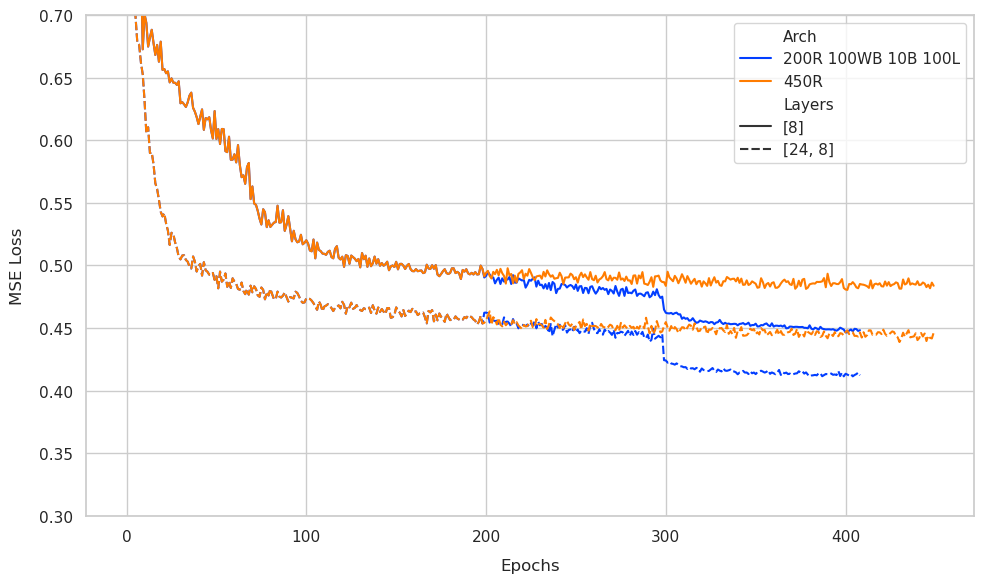

In [4]:
import importlib, utils
importlib.reload(utils)

arch="arch"
selector = "med"
data = "vals"

utils.plot_seaborn(
    # title="ReLU vs BSpline, W&B_lr=0.001 BS_lr=0.0001 ctrl=3",
    model_paths=[
        ("", "[8]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100_bothfirst", "vals", f"{selector}"),
        ("", "[8]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100_bothfirst", "cr_vals", f"{selector}"),

        ("", "[24, 8]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100_bothfirst", "vals", f"{selector}"),
        ("", "[24, 8]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100_bothfirst", "cr_vals", f"{selector}"),
    ],
    aes=[
        ("200R 100WB 10B 100L", "[8]"),
        ("450R", "[8]"),

        ("200R 100WB 10B 100L", "[24, 8]"),
        ("450R", "[24, 8]"),
    ],
    # y_ax = "Train Loss",
    x="epochs", 
    # xlim = 300,
    xmin=0,
    ylim = .7,
    ymin=.3,
    hide_legend=False
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
)

[2025-01-16 12:57:41,398] [WARNING] [real_accelerator.py:174:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.
[2025-01-16 12:57:41,438] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cpu (auto detect)
Avg over last 5 epochs on 100R 50B,[8],med: 0.5071 in 205.3287204257425s
Avg over last 5 epochs on 150R 50B,[8],med: 0.4831 in 247.355979990099s
Avg over last 5 epochs on 200R 50B,[8],med: 0.4832 in 290.98146971287105s
Avg over last 5 epochs on 250R 50B,[8],med: 0.4842 in 334.10332942718435s
Avg over last 5 epochs on 100R 50B,[24, 8],med: 0.4461 in 284.83573534313723s
Avg over last 5 epochs on 150R 50B,[24, 8],med: 0.4408 in 337.9567104059408s
Avg over last 5 epochs on 200R 50B,[24, 8],med: 0.4375 in 391.2594189901959s
Avg over last 5 epochs on 250R 50B,[24, 8],med: 0.4373 in 446.0190738217825s


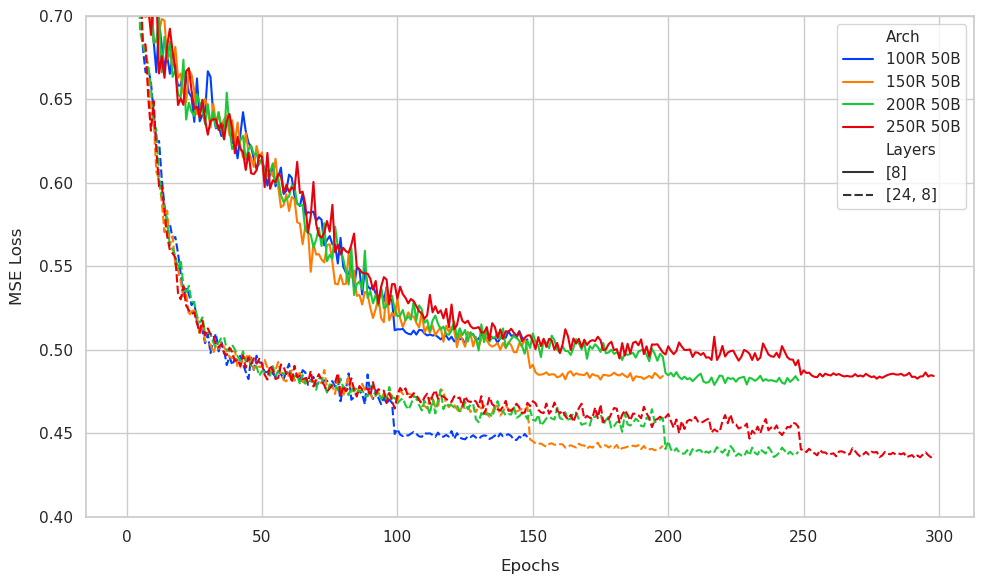

In [1]:
import importlib, utils
importlib.reload(utils)

# arch="[24, 48, 24, 8]"
selector = "med"
data = "vals"

utils.plot_seaborn(
    # title="ReLU vs BSpline, W&B_lr=0.001 BS_lr=0.0001 ctrl=3",
    model_paths=[
        ("RB switching", f"[8]_(0.001,0.0001,0.0001)_(100,50,0,50,0)_100", f"{data}", f"{selector}"),
        ("RB switching", f"[8]_(0.001,0.0001,0.0001)_(150,50,0,50,0)_100", f"{data}", f"{selector}"),
        ("RB switching", f"[8]_(0.001,0.0001,0.0001)_(200,50,0,50,0)_100", f"{data}", f"{selector}"),
        ("RB switching", f"[8]_(0.001,0.0001,0.0001)_(250,50,0,50,0)_100", f"{data}", f"{selector}"),

        ("RB switching", f"[24, 8]_(0.001,0.0001,0.0001)_(100,50,0,50,0)_100", f"{data}", f"{selector}"),
        ("RB switching", f"[24, 8]_(0.001,0.0001,0.0001)_(150,50,0,50,0)_100", f"{data}", f"{selector}"),
        ("RB switching", f"[24, 8]_(0.001,0.0001,0.0001)_(200,50,0,50,0)_100", f"{data}", f"{selector}"),
        ("RB switching", f"[24, 8]_(0.001,0.0001,0.0001)_(250,50,0,50,0)_100", f"{data}", f"{selector}"),
    ],
    aes=[
        ("100R 50B", "[8]"),
        ("150R 50B", "[8]"),
        ("200R 50B", "[8]"),
        ("250R 50B", "[8]"),

        ("100R 50B", "[24, 8]"),
        ("150R 50B", "[24, 8]"),
        ("200R 50B", "[24, 8]"),
        ("250R 50B", "[24, 8]"),
    ],
    # y_ax = "Train Loss",
    x = "epochs", 
    # xlim = 300,
    xmin = 0,
    ylim = .7,
    ymin = .4,
    hide_legend = False
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
)

Avg over last 5 epochs on ReLU > BS > LS,[8],med: 0.4644 in 204.20749877999995s
Avg over last 5 epochs on ReLU,[8],med: 0.48819999999999997 in 300.3442181600002s
Avg over last 5 epochs on ReLU > BS > LS,[24, 8],med: 0.4304 in 79.47346802884616s
Avg over last 5 epochs on ReLU,[24, 8],med: 0.4443 in 44.978912528846145s
Avg over last 5 epochs on ReLU > BS > LS,[24, 48, 24, 8],med: 0.4144 in 168.02260752427193s
Avg over last 5 epochs on ReLU,[24, 48, 24, 8],med: 0.4297 in 175.39896086407776s


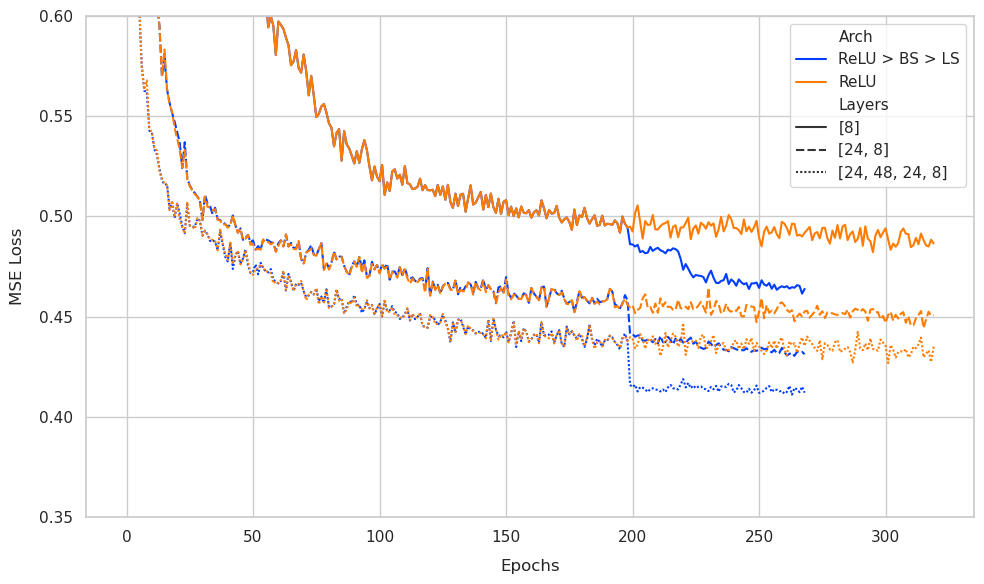

In [9]:
import importlib, utils
importlib.reload(utils)

selector = "med"
data = "vals"

utils.plot_seaborn(
    # title="ReLU vs BSpline, W&B_lr=0.001 BS_lr=0.0001 ctrl=3",
    model_paths=[
        ("old/timing_broken/R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", f"{selector}"),
        ("old/timing_broken/R->B->L/8", "[8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "cr_vals", f"{selector}"),

        ("old/timing_broken/R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", f"{selector}"),
        ("old/timing_broken/R->B->L/24,8", "[24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "cr_vals", f"{selector}"),

        ("old/timing_broken/R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "vals", f"{selector}"),
        ("old/timing_broken/R->B->L/24,48,24,8", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(200,20,0,120,50)_100", "cr_vals", f"{selector}"),
    ],
    aes=[
        ("ReLU > BS > LS", "[8]"),
        ("ReLU", "[8]"),

        ("ReLU > BS > LS", "[24, 8]"),
        ("ReLU", "[24, 8]"),

        ("ReLU > BS > LS", "[24, 48, 24, 8]"),
        ("ReLU", "[24, 48, 24, 8]"),
    ],
    # y_ax = "Train Loss",
    x = "epochs", 
    # xlim = 300,
    xmin = 0,
    ylim = .6,
    ymin = .35,
    hide_legend = False
    # vbars = [(149, "lightgrey"), (169, "lightgrey")],
)

Avg over last 5 epochs on FB,[8],med: 0.4797 in 336.59717409999996s
Avg over last 5 epochs on L,[8],med: 0.44830000000000003 in 476.10007235s
Avg over last 5 epochs on FB,[24, 8],med: 0.42569999999999997 in 761.8854398500005s


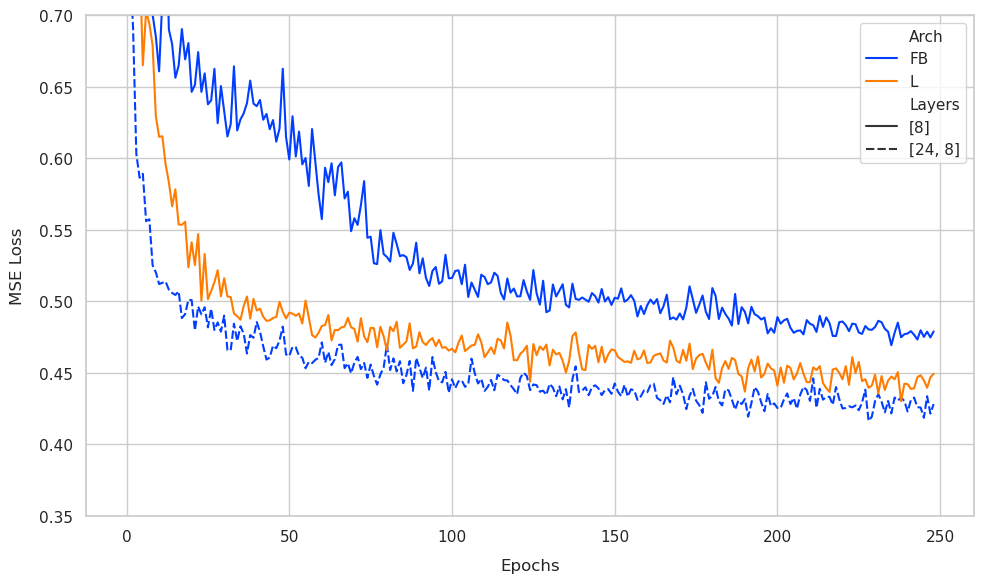

In [6]:
import importlib, utils
importlib.reload(utils)

selector = "med"
data = "vals"

utils.plot_seaborn(
    model_paths=[

        ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50FB'])_20", "vals", f"{selector}"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),

        ("", "[24, 8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50FB'])_20", "vals", f"{selector}"),
        # ("", "[24, 8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),

        ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50FB'])_20", "vals", f"{selector}"),
        # ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),
        
    ],
    aes=[ 
        ("FB", "[8]"),
        ("L", "[8]"),
        ("FB", "[24, 8]"),
        ("L", "[24, 8]"),
        ("FB", "[24, 48, 24, 8]"),
        ("L", "[24, 48, 24, 8]"),
    ],
    x = "epochs", 
    xmin = 0,
    ylim = .7,
    ymin = .35,
    hide_legend = False,
)

Avg over last 5 epochs on FB,[8],med: 0.4604 in 415.94915309523833s
Avg over last 5 epochs on FB,[24, 8],med: 0.4165 in 657.3143823500003s
Avg over last 5 epochs on FB,[24, 48, 24, 8],med: 0.4114 in 1048.4508091499995s


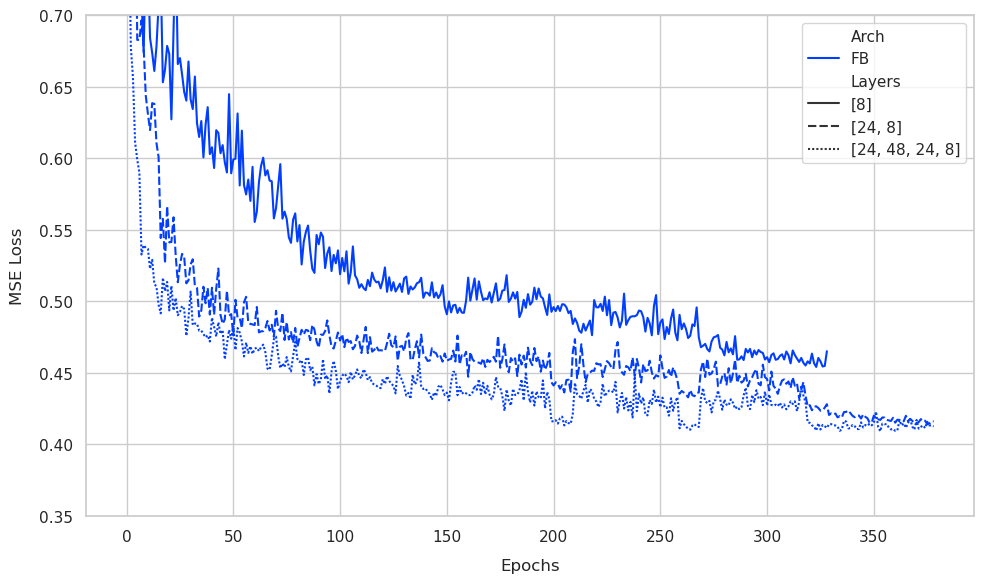

In [15]:
import importlib, utils
importlib.reload(utils)

selector = "med"
data = "vals"

utils.plot_seaborn(
    model_paths=[

        ("cycling", "[8]_(0.001,0.0001,0.0001)_(['150R', '10B', '50FB', '10B', '50FB', '10B', '50L'])_20", "vals", f"{selector}"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),

        ("cycling", "[24, 8]_(0.001,0.0001,0.0001)_(['200R', '10B', '50FB', '10B', '50FB', '10B', '50L'])_20", "vals", f"{selector}"),
        # ("", "[24, 8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),

        ("cycling", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(['200R', '10B', '50FB', '10B', '50FB', '10B', '50L'])_20", "vals", f"{selector}"),
        # ("", "[24, 48, 24, 8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),
        
    ],
    aes=[ 
        ("FB", "[8]"),
        ("FB", "[24, 8]"),
        ("FB", "[24, 48, 24, 8]"),
        ("L", "[24, 8]"),
        ("FB", "[24, 48, 24, 8]"),
        ("L", "[24, 48, 24, 8]"),
    ],
    x = "epochs", 
    xmin = 0,
    ylim = .7,
    ymin = .35,
    hide_legend = False,
)

Avg over last 5 epochs on thing,[1],med: 0.5176 in 534.8021773135138s
Avg over last 5 epochs on relu,[8],med: 0.4868 in 191.56679745544545s


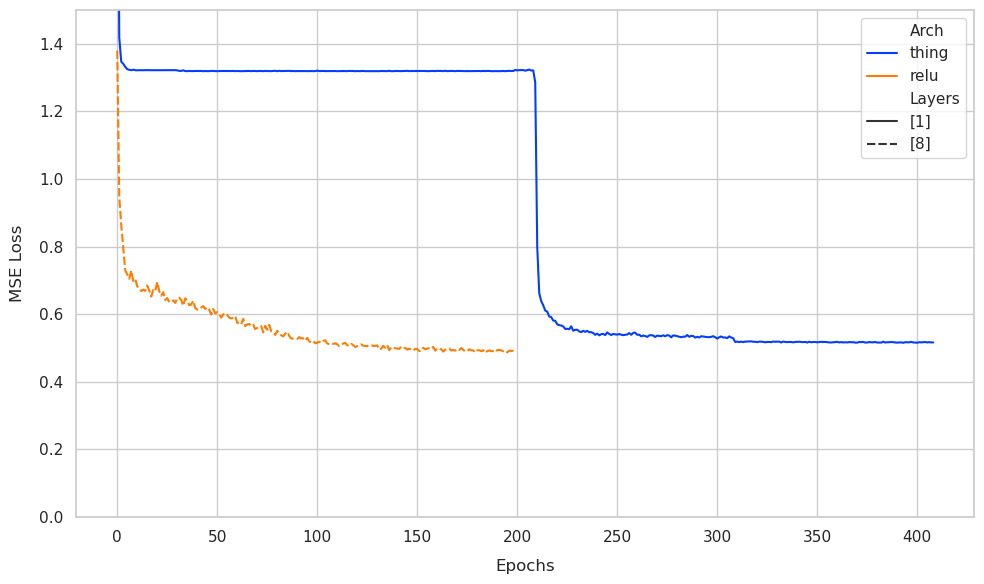

In [18]:
import importlib, utils
importlib.reload(utils)

selector = "med"
data = "vals"

utils.plot_seaborn(
    # title="ReLU vs BSpline, W&B_lr=0.001 BS_lr=0.0001 ctrl=3",
    model_paths=[
        
        ("small models", "[1]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100", "vals", f"{selector}"),
        # ("small models", "[1]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100", "cr_vals", f"{selector}"),

        ("R", "[8]_(0.001,0.0001,0.0001)_(200,0,0,0,0)_100", "vals", f"{selector}")

        # ("", "[2]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100", "vals", f"{selector}"),
        # ("", "[2]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100", "cr_vals", f"{selector}"),

        # ("RB(WB)L", "[8]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100", "vals", f"{selector}"),
        # ("RB(WB)L", "[8]_(0.001,0.0001,0.0001)_(200,10,100,250,100)_100", "cr_vals", f"{selector}"),

        # ("", "[24, 8]_(0.001,0.0001,0.0001)_(['150R', '10B', '50FB', '10B', '50FB', '10B', '50L'])_20", "vals", f"{selector}"),
        # ("", "[24, 8]_(0.001,0.0001,0.0001)_(['150R', '10B', '50FB', '10B', '50FB', '10B', '50L'])_20", "cr_vals", f"{selector}"),

        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50FB'])_20", "vals", f"{selector}"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50FB'])_20", "cr_vals", f"{selector}"),

        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "vals", f"{selector}"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '50WB', '50L'])_20", "cr_vals", f"{selector}"),

        # ("", "this mah test", "vals", f"{selector}"),
        # ("", "this mah test", "cr_vals", f"{selector}"),
        
    ],
    aes=[
        ("thing", "[1]"),
        ("relu", "[8]"),

        # ("thing", "[2]"),
        # ("relu", "[2]"),

        # ("thing", "[8]"),
        # ("relu", "[8]"),

    ],
    # y_ax = "Train Loss",
    x = "epochs", 
    # xlim = 300,
    xmin = 0,
    ylim = 1.5,
    ymin = 0,
    hide_legend = False,
    # vbars = [
    #     (199, "lightgrey"),
    #     (209, "lightgrey"),
    #     (259, "lightgrey"),
    #     (269, "lightgrey"),
    #     (319, "lightgrey"),
    #     (329, "lightgrey"),
    # ],
)

Avg over last 5 epochs on FB - old,[8],med: 0.4832 in 436.56176800000003s
Avg over last 5 epochs on L - old,[8],med: 0.4535 in 430.1248102s
Avg over last 5 epochs on FB,[8],med: 0.4811 in 439.44562639999964s
Avg over last 5 epochs on L,[8],med: 0.4693 in 436.20255059999994s


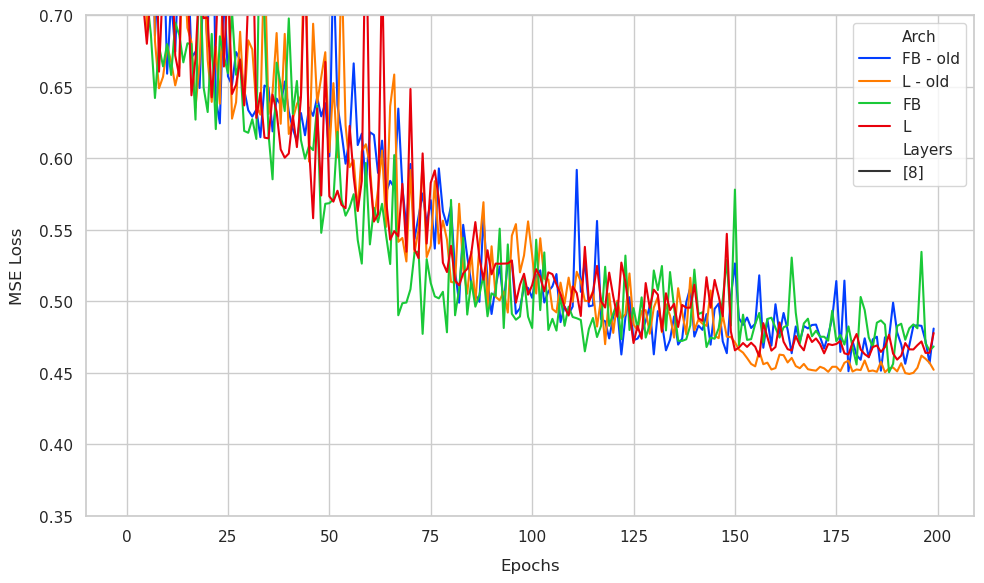

In [6]:
import importlib, utils
importlib.reload(utils)

selector = "med"
data = "vals"

utils.plot_seaborn(
    model_paths=[

        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '10B', '50FB'])_1", "vals", f"{selector}"),
        # ("", "[8]_(0.001,0.0001,0.0001)_(['150R', '10B', '50L'])_1", "vals", f"{selector}"),

        ("freezing classical- broken?", "[8]_(0.001,0.0001,0.0001)_(['150WB', '50FB'])_5", "vals", f"{selector}"),
        ("freezing classical- broken?", "[8]_(0.001,0.0001,0.0001)_(['150WB', '50L'])_5", "vals", f"{selector}"),


        ("", "[8]_(0.001,0.0001,0.0001)_(['150WB', '50FB'])_5", "vals", f"{selector}"),
        ("", "[8]_(0.001,0.0001,0.0001)_(['150WB', '50L'])_5", "vals", f"{selector}"),

    ],
    aes=[ 
        ("FB - old", "[8]"),
        ("L - old", "[8]"),
        ("FB", "[8]"),
        ("L", "[8]")
    ],
    x = "epochs", 
    xmin = 0,
    ylim = .7,
    ymin = .35,
    hide_legend = False,
)